In [26]:
import sys 
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np 
import os 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

## Exercises

1. How would define clustering? can you name a few clustering algorithms? 
-> Clustering is a group of techniques that are used to group instances with similar characteristics (without the availability of labels, it is an unsupervised task) 
Some clustering: PCA / DBSCAN / Gaussian Mixture Models... 


2. What are some of the main applications of clustering algorithms
    - Customer segmentation 
    - Semi-supervised learning
    - Image compression / image segmentation 
    - Data analysis 
    - Dim. reduction 
    - Anomaly detection 


3. Describe the two techniques to select the correct number of clusters in k-means
    - A. plot the model's inertia w/ respect to the # of clusters chosen and find the elbow (note: the model inertia will always decrease with an increasing number of clusters) 
    - B. Plot the model's silhouette score ((a-b)/max(a,b)) and find the max


4. What is label propagation? Why would you implement it and how? 
-> label propagation is used as a sort of semi-supervised learning technique. With an unlabeled dataset, you can select 50 representative observations, manually label them and cluster the rest of the dataset on these obs. 


6. When is active learning useful? 
    - human expert provides labels for some instances 
        - Train model on dataset with instances that are already labeled
        - Make predictions on unlabeled instances
        - Have human check and label instances that are most uncertain 
        - Repeat until no longer need to loop in human 


7. Difference between anomaly and novelty detection
-> Anomaly detection is used when we know that the dataset may have outliers (we do not know for certain that the dataset is ‘clean’ of outliers’ 
On the other hand, novelty detection is used when a historic dataset has no outliers and new outliers are introduced and detected (as novel instances) 
Note: The differences are when you train on a dataset that may contain outliers and one that may be presumed to be clean 


8. What is a Gaussian mixture? 
->Probabilistic Model where assume that instance ‘location’ in dataset determined by a mix of Gaussian distributions (with unknown mean and covariance) 
—> data grouped in finite number of clusters (each of potentially different ellipsoidal shape, size, orientation) 
—> Useful for anomaly detection, clustering, density estimation 


9. Can you name two techniques to find right number of clusters in Gaussian mixture model? 
    - Use AIC or BIC (min) 
    - Use Bayesian Gaussian mixture model —> automatically selects # of clusters.  

## Clustering Olivetti Dataset with Kmeans 

In [11]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [22]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [34]:
print(olivetti.data[1:5,])
print('\n\n')
print(olivetti.target)

[[0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 [0.1983471  0.19421488 0.19421488 ... 0.75206614 0.75206614 0.73966944]
 [0.5        0.54545456 0.58264464 ... 0.17768595 0.17355372 0.17355372]]



[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 2

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit

X = olivetti.data
y = olivetti.target


## Train_val / Testsplit
strat_split = StratifiedShuffleSplit(test_size = 0.1, random_state=42)
train_val_idx, test_idx = next(strat_split.split(X,y)) # @!@tip@code next returns next item from iterator!
X_train_val = X[train_val_idx]
y_train_val = y[train_val_idx]
X_test = X[test_idx]
y_test = y[test_idx]

## Train / Val split
strat_split = StratifiedShuffleSplit(n_splits=1,
                                     test_size = 80,
                                     random_state=43) # @note: test_size can be fraction or int
train_idx, val_idx = next(strat_split.split(X_train_val, y_train_val))
X_train = X[train_idx]
y_train = y[train_idx]
X_val = X[val_idx]
y_val = y[val_idx]

## Check set sizes 
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(280, 4096) (80, 4096) (40, 4096)
(280,) (80,) (40,)


In [74]:
## Check class dist in each of the classes 
for data in [y_train, y_val, y_test]:
    unique_elements, count_elements = np.unique(np.array(data), return_counts=True)
    print(unique_elements)
    print(count_elements)
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
[ 7  8  7  9  7  6  6  6  9  9  9  7  9  9  7 10  9  7  8  9  8  6  8  8
  7 10  7  8  8 10  6  7  6  6  9  8]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 26 27 28 30 31 32 33 34 35]
[3 2 3 1 3 4 4 4 1 1 1 3 1 1 3 1 3 2 1 2 4 2 2 3 3 2 2 4 3 4 4 1 2]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]




In [75]:
## 4096 columns -> perform PCA 
from sklearn.decomposition import PCA

pca = PCA(.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

X_train_pca.shape # 200 cols instead of 4096

In [94]:
from sklearn.cluster import KMeans

k_means_per_k = []
for k in range(10,150,5):
        if k % 20 == 0: 
            print("K = {}".format(k))
        kmeans = KMeans(n_clusters = k,random_state=42).fit(X_train_pca)
        k_means_per_k.append(kmeans)

K = 20
K = 40
K = 60
K = 80
K = 100
K = 120
K = 140


Best k: 20


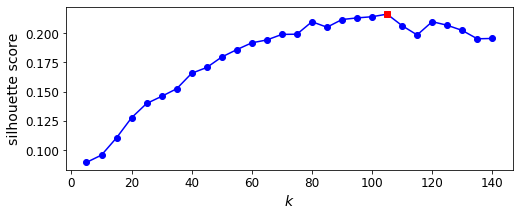

In [98]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                        for model in k_means_per_k]
best_index = np.argmax(silhouette_scores)
print("Best k: {}".format(best_index))
k_range = range(5, 150, 5)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range[:-1], silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

Text(0, 0.5, 'Model Inertia')

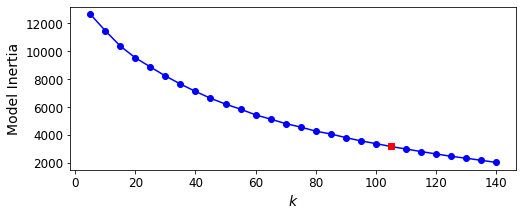

In [116]:
## Get model inertia - not as  useful as silhouette score 
model_inertias = [model.inertia_ for model in k_means_per_k]

plt.figure(figsize=(8,3))
plt.plot(k_range[:-1], model_inertias, 'bo-')
plt.plot(best_k, model_inertias[best_index], 'rs')
plt.xlabel('$k$',fontsize=14)
plt.ylabel('Model Inertia', fontsize=14)

Cluster  0


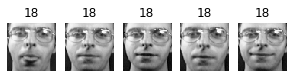

Cluster  1


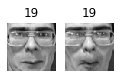

Cluster  2


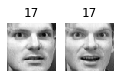

Cluster  3


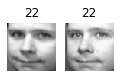

Cluster  4


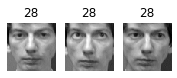

Cluster  5


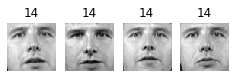

Cluster  6


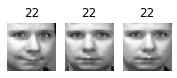

Cluster  7


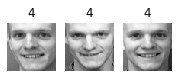

Cluster  8


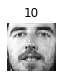

Cluster  9


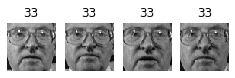

Cluster  10


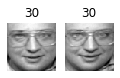

Cluster  11


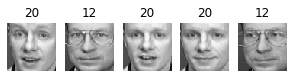

Cluster  12


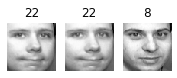

Cluster  13


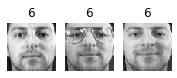

Cluster  14


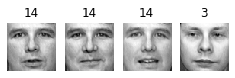

Cluster  15


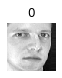

Cluster  16


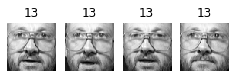

Cluster  17


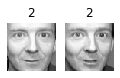

Cluster  18


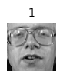

Cluster  19


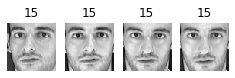

Cluster  20


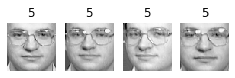

Cluster  21


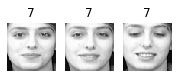

Cluster  22


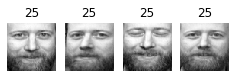

Cluster  23


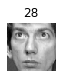

Cluster  24


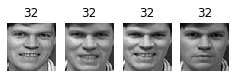

Cluster  25


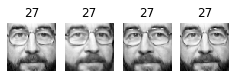

Cluster  26


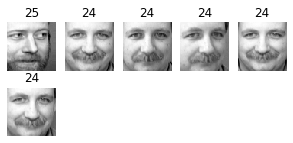

Cluster  27


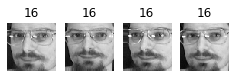

Cluster  28


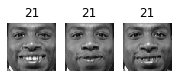

Cluster  29


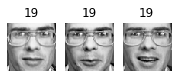

Cluster  30


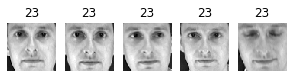

Cluster  31


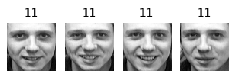

Cluster  32


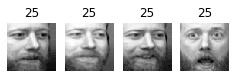

Cluster  33


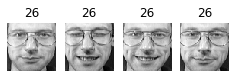

Cluster  34


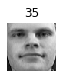

Cluster  35


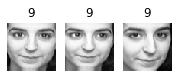

Cluster  36


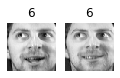

Cluster  37


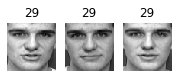

Cluster  38


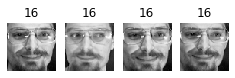

Cluster  39


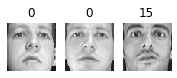

Cluster  40


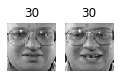

Cluster  41


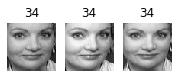

Cluster  42


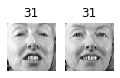

Cluster  43


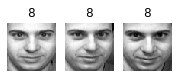

Cluster  44


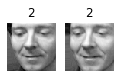

Cluster  45


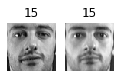

Cluster  46


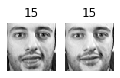

Cluster  47


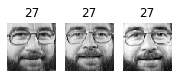

Cluster  48


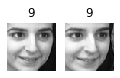

Cluster  49


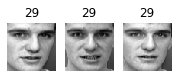

Cluster  50


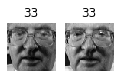

Cluster  51


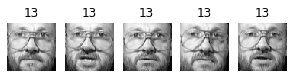

Cluster  52


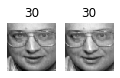

Cluster  53


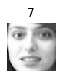

Cluster  54


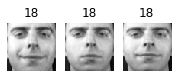

Cluster  55


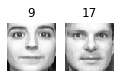

Cluster  56


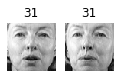

Cluster  57


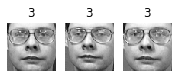

Cluster  58


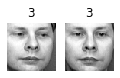

Cluster  59


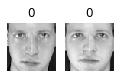

Cluster  60


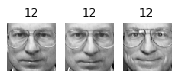

Cluster  61


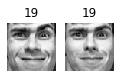

Cluster  62


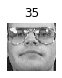

Cluster  63


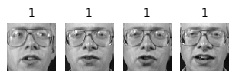

Cluster  64


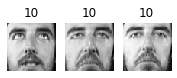

Cluster  65


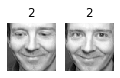

Cluster  66


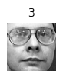

Cluster  67


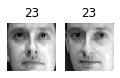

Cluster  68


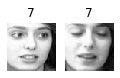

Cluster  69


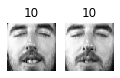

Cluster  70


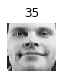

Cluster  71


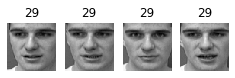

Cluster  72


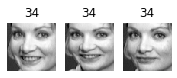

Cluster  73


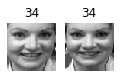

Cluster  74


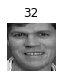

Cluster  75


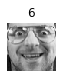

Cluster  76


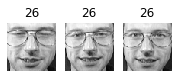

Cluster  77


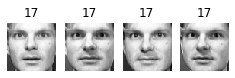

Cluster  78


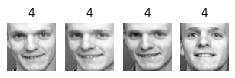

Cluster  79


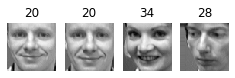

Cluster  80


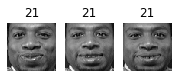

Cluster  81


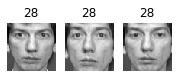

Cluster  82


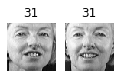

Cluster  83


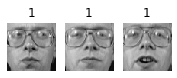

Cluster  84


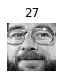

Cluster  85


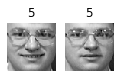

Cluster  86


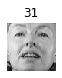

Cluster  87


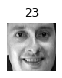

Cluster  88


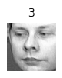

Cluster  89


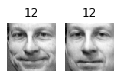

Cluster  90


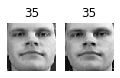

Cluster  91


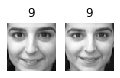

Cluster  92


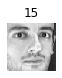

Cluster  93


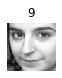

Cluster  94


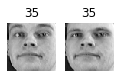

Cluster  95


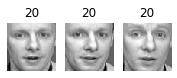

Cluster  96


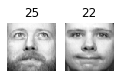

Cluster  97


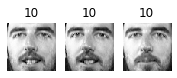

Cluster  98


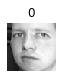

Cluster  99


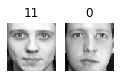

Cluster  100


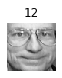

Cluster  101


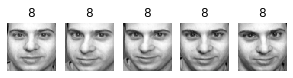

Cluster  102


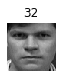

Cluster  103


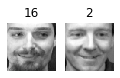

Cluster  104


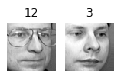

Cluster  105


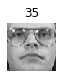

Cluster  106


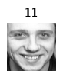

Cluster  107


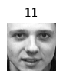

Cluster  108


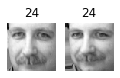

Cluster  109


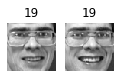

In [152]:
def plot_faces(faces, labels, n_cols = 5):
    n_rows = (len(faces)-1) // n_cols + 1 # // floor division @trick 
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64,64), cmap='gray')
        plt.axis('off')
        plt.title(label)
    plt.show()
    
best_model = k_means_per_k[best_index]
for cluster_id in np.unique(best_model.labels_):
    print("Cluster ", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster].reshape(-1,64,64) #shape(nrows, 64,64) - so # of instances
    labels=y_train[in_cluster]
    plot_faces(faces,labels)
    


## Olivetti dataset continued

In [128]:
## Train a classifier and evaluate performance 
## Then use kmeans as a dim reduction tool -> train classifier on reduced set 
## Which cluster allows for best performance? 
## What if you append the features freom the reduced set to the original features? 

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
val_preds = rf.predict(X_val)
accuracy_score(y_val, val_preds) # 93.75%

0.9375

In [133]:
## Using kmeans as a dim reduction tool 
## --> replacing images with their distance to the clusters 
X_train_reduced = best_model.transform(X_train_pca) 
X_val_reduced = best_model.transform(X_val_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [136]:
print(X_train.shape)
print(X_train_pca.shape)
print(X_train_reduced.shape) # 110 cols for the 110 clusters

(280, 4096)
(280, 200)
(280, 110)


In [138]:
rf.fit(X_train_reduced, y_train)
accuracy_score(rf.predict(X_val_reduced),y_val) ## performance dropped - tune # of clusters

0.75

In [147]:
for n_clusters in k_range: 
    if n_clusters % 20 == 0: 
        print(n_clusters)
    kmeans_rf_pipe = Pipeline([
        ('kmeans', KMeans(n_clusters=n_clusters, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    kmeans_rf_pipe.fit(X_train_pca, y_train)
    print(n_clusters, kmeans_rf_pipe.score(X_val_pca, y_val))

5 0.5125
10 0.5125
15 0.625
20
20 0.6
25 0.675
30 0.6625
35 0.7
40
40 0.725
45 0.7125
50 0.775
55 0.75
60
60 0.7375
65 0.7375
70 0.7125
75 0.7625
80
80 0.75
85 0.725
90 0.675
95 0.7125
100
100 0.7
105 0.725
110 0.75
115 0.7125
120
120 0.7375
125 0.725
130 0.7125
135 0.75
140
140 0.7375
145 0.725


## GMM 

In [149]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

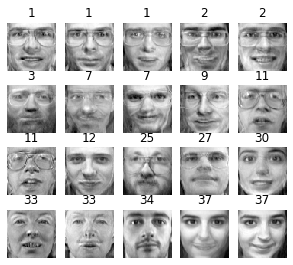

In [153]:
n_gen_faces = 20 
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)
plot_faces(gen_faces, y_gen_faces)

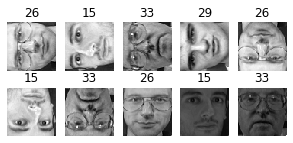

In [154]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [157]:
def reconstruction_error(pca,X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1) # take last axis 
    return mse

In [158]:
reconstruction_error(pca, X_train).mean()

0.00018287863

In [159]:
reconstruction_error(pca, X_bad_faces).mean()

0.005636581

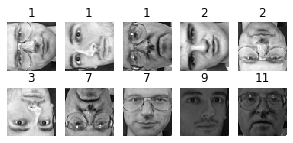

In [160]:
plot_faces(X_bad_faces, y_gen_faces)


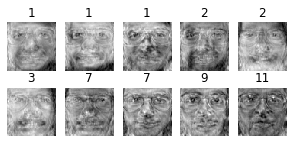

In [164]:
X_bad_faces_pca = pca.transform(X_bad_faces)

X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)